In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib as plt
import seaborn as sns
import cv2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
skin_df = pd.read_csv('../raw_data/HAM10000_metadata.csv')
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [3]:
skin_df['path'] = [f'../raw_data/HAM10000_all/{img}.jpg' for img in skin_df['image_id']]

In [4]:
skin_df['image_resized'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

In [5]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_resized
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[190, 153, 194], [192, 154, 196], [191, 153,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[185, 127, 137], [189, 133, 147], [194, 136,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[24, 11, 17], [26, 13, 22], [38, 21, 32], [5..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[134, 90, 113], [147, 102, 125], [159, 115, ..."
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033084.jpg,"[[[155, 137, 148], [154, 136, 147], [151, 134,..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033550.jpg,"[[[5, 6, 4], [6, 7, 4], [7, 8, 6], [7, 7, 5], ..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033536.jpg,"[[[112, 102, 105], [127, 116, 117], [141, 127,..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../raw_data/HAM10000_all/ISIC_0032854.jpg,"[[[158, 122, 146], [159, 122, 141], [154, 112,..."


In [6]:
#skin_df.drop(skin_df[skin_df['dx'] == 'nv'].index, inplace = True)

In [7]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_resized
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[190, 153, 194], [192, 154, 196], [191, 153,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[185, 127, 137], [189, 133, 147], [194, 136,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[24, 11, 17], [26, 13, 22], [38, 21, 32], [5..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[134, 90, 113], [147, 102, 125], [159, 115, ..."
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033084.jpg,"[[[155, 137, 148], [154, 136, 147], [151, 134,..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033550.jpg,"[[[5, 6, 4], [6, 7, 4], [7, 8, 6], [7, 7, 5], ..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033536.jpg,"[[[112, 102, 105], [127, 116, 117], [141, 127,..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../raw_data/HAM10000_all/ISIC_0032854.jpg,"[[[158, 122, 146], [159, 122, 141], [154, 112,..."


In [8]:
y = skin_df['dx']

In [9]:
dict_target = {'bkl':0, 'nv':1, 'df':2, 'mel':3, 'vasc':4, 'bcc':5, 'akiec':6}

In [10]:
y_num = y.map(dict_target.get)

In [11]:
skin_df['target'] = y_num

In [12]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_resized,target
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[190, 153, 194], [192, 154, 196], [191, 153,...",0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3...",0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[185, 127, 137], [189, 133, 147], [194, 136,...",0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[24, 11, 17], [26, 13, 22], [38, 21, 32], [5...",0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[134, 90, 113], [147, 102, 125], [159, 115, ...",0
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033084.jpg,"[[[155, 137, 148], [154, 136, 147], [151, 134,...",6
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033550.jpg,"[[[5, 6, 4], [6, 7, 4], [7, 8, 6], [7, 7, 5], ...",6
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033536.jpg,"[[[112, 102, 105], [127, 116, 117], [141, 127,...",6
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../raw_data/HAM10000_all/ISIC_0032854.jpg,"[[[158, 122, 146], [159, 122, 141], [154, 112,...",6


In [13]:
X = skin_df['image_resized']

In [14]:
X_stack = np.stack(X)

In [15]:
X_stack.shape

(10015, 75, 100, 3)

In [21]:
75*100*3

22500

In [16]:
X_stack_reshaped = np.reshape(X_stack, (10015, 22500))

In [17]:
X_stack_reshaped.shape

(10015, 22500)

In [45]:
from sklearn.manifold import TSNE
kpca= TSNE(n_components=2)
X_pca=kpca.fit_transform(X_stack_reshaped)

/Users/elenaschubert/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/elenaschubert/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



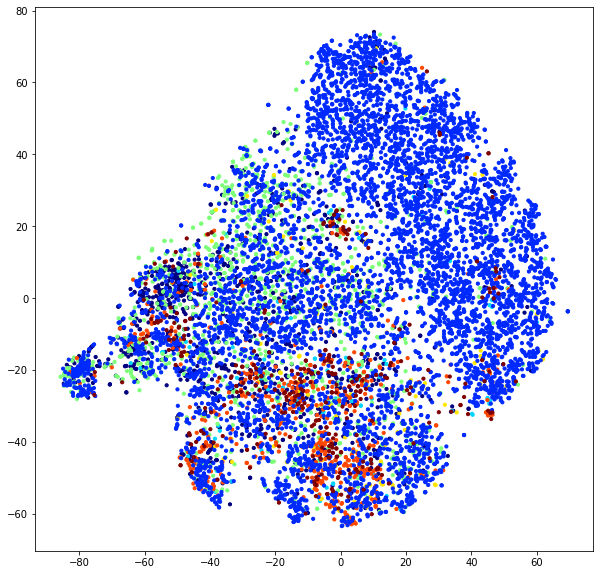

In [46]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0], X_pca[:,1], c = skin_df['target'],s = 10, cmap=cm.jet)
plt.show()

In [47]:
#import plotly.express as px
#fig = px.scatter_3d(skin_df, x='sepal_length', y='sepal_width', z='petal_width',
#              color='species')
#fig.show()

In [37]:
import plotly.graph_objects as go
import numpy as np

# Helix equation


fig = go.Figure(data=[go.Scatter3d(
    x=X_pca[:,0],
    y=X_pca[:,1],
    z=X_pca[:,2],
    mode='markers',
    marker=dict(
        size=5,
        color=skin_df['target'],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8,
        showscale = True
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

<AxesSubplot:xlabel='dx', ylabel='Count'>

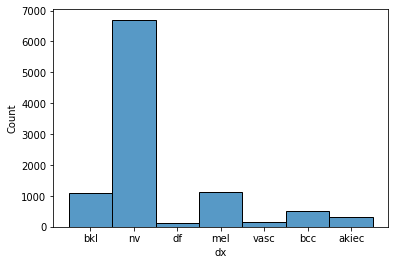

In [32]:
sns.histplot(data =skin_df['dx'])